In [26]:
from sklearn.neural_network import MLPClassifier
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import io

dataset = pd.read_csv('/content/drive/MyDrive/Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
dataset.head()

,SeverMachine
0,0.075269
1,0.086022
2,0.075269
3,0.086022
4,0.086022


In [29]:

import pandas as pd

import io

dataset1 = pd.read_csv('/content/drive/MyDrive/Data1.csv')

In [30]:
dataset1.head()

,SeverMachine,label
0,0.075269,0
1,0.086022,0
2,0.075269,0
3,0.086022,0
4,0.086022,0


In [31]:
dataset1

,SeverMachine,label
0,0.075269,0
1,0.086022,0
2,0.075269,0
3,0.086022,0
4,0.086022,0
...,...,...
28474,0.075269,0
28475,0.064516,0
28476,0.064516,0
28477,0.064516,0


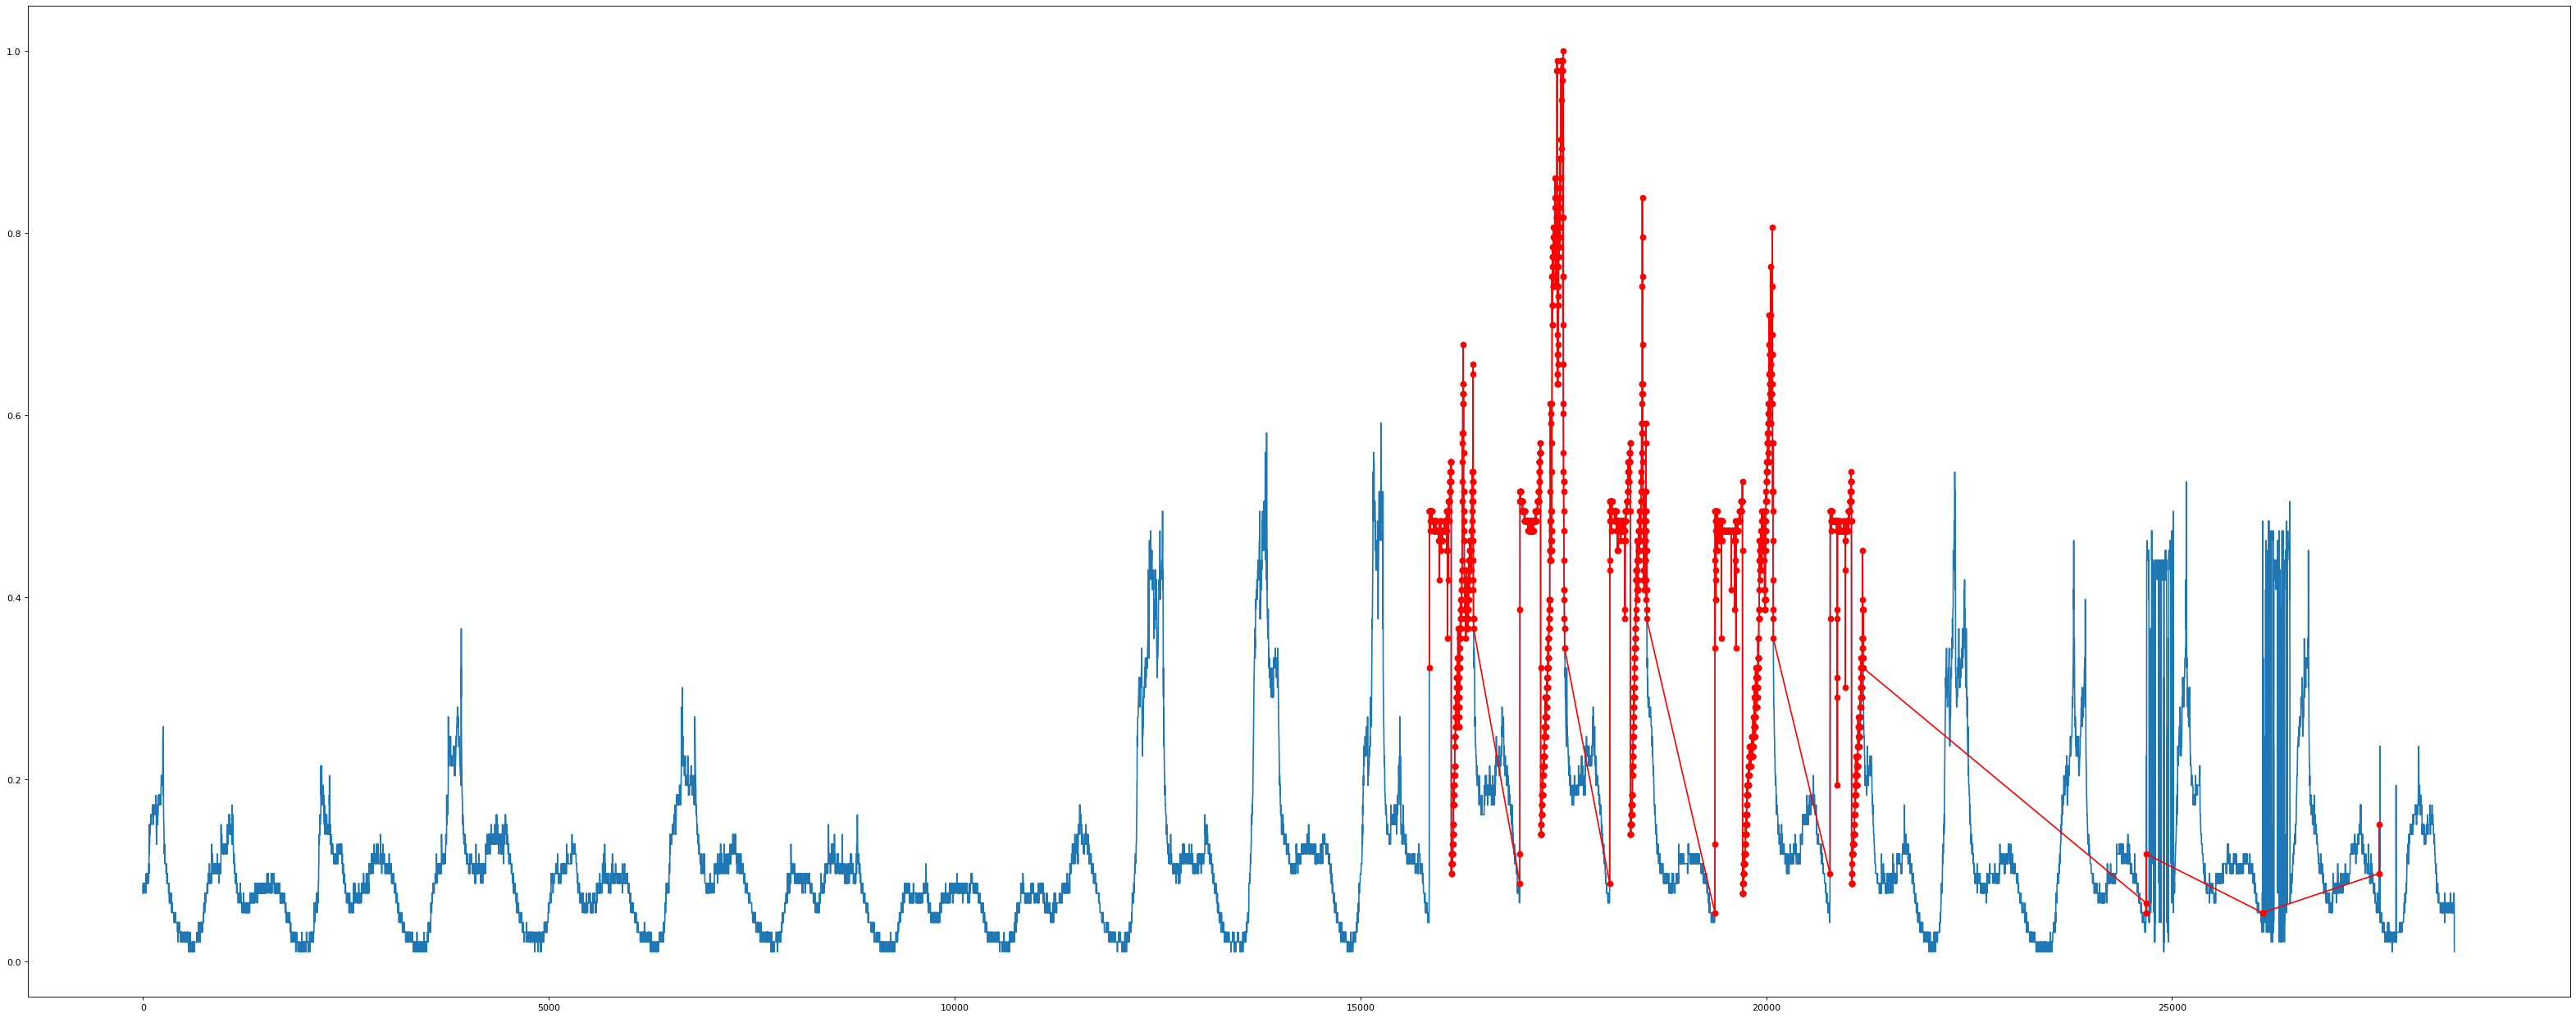

In [32]:
fig, ax = plt.subplots(num=None, figsize=(50,20), dpi=80, facecolor='w', edgecolor='k')



ax.plot(dataset1.reset_index().SeverMachine)

ax.plot(dataset1[dataset1.label == 1].SeverMachine, 'r', marker="o")

In [33]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(dataset, dataset1['label'])


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
dataset1['label']

0        0
1        0
2        0
3        0
4        0
        ..
28474    0
28475    0
28476    0
28477    0
28478    0
Name: label, Length: 28479, dtype: int64

In [35]:
dataset['anomaly'] = clf.predict(dataset)

In [36]:
dataset.head()

,SeverMachine,anomaly
0,0.075269,0
1,0.086022,0
2,0.075269,0
3,0.086022,0
4,0.086022,0


In [37]:
anomaly=dataset.loc[dataset['anomaly']==1]
anomaly_index=list(anomaly.index)
print(anomaly)

Empty DataFrame
Columns: [SeverMachine, anomaly]
Index: []


In [39]:
print(confusion_matrix(dataset1['label'],dataset['anomaly']))
print(classification_report(dataset1['label'],dataset['anomaly']))

[[25785     0]
 [ 2694     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     25785
           1       0.00      0.00      0.00      2694

    accuracy                           0.91     28479
   macro avg       0.45      0.50      0.48     28479
weighted avg       0.82      0.91      0.86     28479



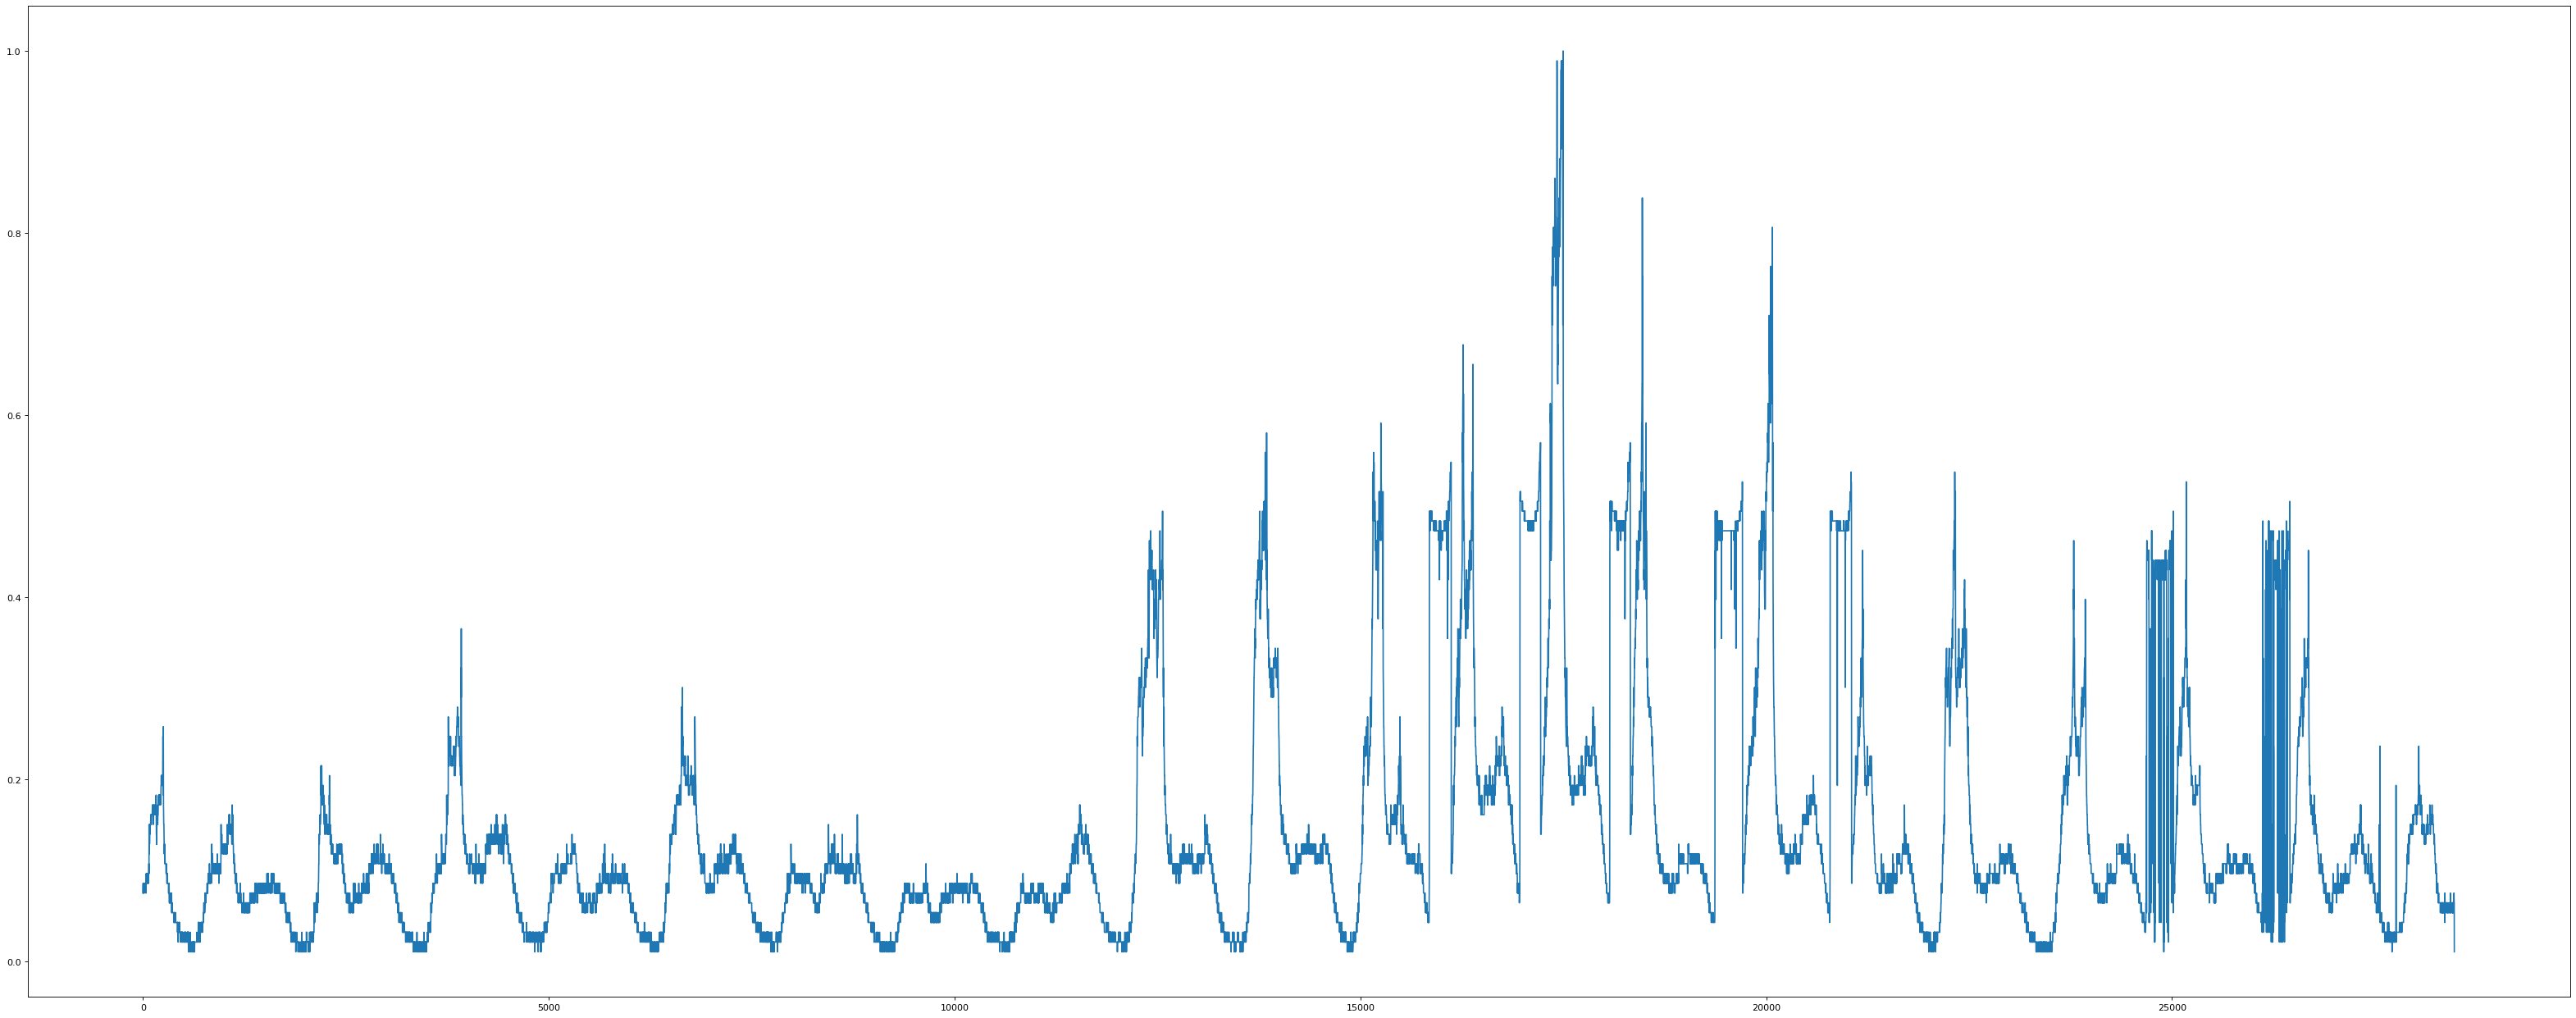

In [12]:
fig, ax = plt.subplots(num=None, figsize=(50,20), dpi=80, facecolor='w', edgecolor='k')



ax.plot(dataset.reset_index().SeverMachine)

ax.plot(dataset[dataset.anomaly == 1].SeverMachine, 'r', marker="o")